In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from scipy.io import arff
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

In [10]:
data = arff.loadarff('phish_legit_7.arff')
df = pd.DataFrame(data[0])

In [11]:
df

,domain_digit_count,subdomain_digit_count,path_digit_count,domain_length,subdomain_length,path_length,isKnownTld,www,com,punnyCode,...,keyword_count,brand_name_count,negligible_word_count,target_brand_count,target_keyword_count,similar_keyword_count,similar_brand_count,average_compound_words,random_words,class
0,0.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.000000,0.0,b'phish'
1,0.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,b'phish'
2,2.0,7.0,0.0,14.0,45.0,0.0,1.0,0.0,1.0,0.0,...,5.0,1.0,2.0,0.0,0.0,0.0,0.0,13.000000,0.0,b'phish'
3,2.0,7.0,0.0,14.0,45.0,0.0,1.0,0.0,1.0,0.0,...,5.0,1.0,2.0,0.0,0.0,0.0,0.0,13.000000,0.0,b'phish'
4,2.0,0.0,0.0,14.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,0.0,b'phish'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73570,0.0,0.0,0.0,8.0,3.0,46.0,1.0,1.0,0.0,0.0,...,0.0,1.0,7.0,1.0,1.0,1.0,1.0,12.500000,0.0,b'legitimate'
73571,0.0,0.0,0.0,8.0,3.0,34.0,1.0,1.0,0.0,0.0,...,1.0,0.0,4.0,0.0,1.0,1.0,0.0,7.666667,0.0,b'legitimate'
73572,0.0,0.0,8.0,5.0,6.0,83.0,1.0,0.0,0.0,0.0,...,0.0,1.0,6.0,0.0,2.0,2.0,0.0,32.000000,0.0,b'legitimate'
73573,1.0,0.0,0.0,9.0,0.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,8.000000,0.0,b'legitimate'


In [3]:
new_df = df.sample(frac=1)

In [4]:
X = new_df.drop('class', axis=1)
encode = preprocessing.LabelEncoder()
y_str2= new_df['class'].values
encode.fit(y_str2)
y = encode.transform(y_str2)

In [5]:
X_train,X_test_mid,y_train,y_test_mid = train_test_split(X, y, test_size = .2)
x_test,x_val,y_test,y_val =train_test_split(X_test_mid, y_test_mid, test_size = .5)

In [7]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [7]:
def get_metrics(y_true, y_pred):
    dict_data = {}
    
    dict_data['model_name'] = "Gardient boost classifier"
    dict_data['accuracy'] = accuracy_score(y_true, y_pred)
    dict_data['precision'] = precision_score(y_true, y_pred)  
    dict_data['f1'] = f1_score(y_true, y_pred)  
    dict_data['recall'] = recall_score(y_true, y_pred)  
    dict_data['roc'] = roc_auc_score(y_true, y_pred)  
    
    return dict_data

In [8]:
df_result = pd.DataFrame(columns=['accuracy','precision','f1','recall','roc'])

In [9]:
%%time
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
gbc.fit(X_train,y_train)
predictions = gbc.predict(x_test)
data = get_metrics(y_test,predictions)
df_result = df_result.append(data, ignore_index=True)

Wall time: 1min 38s


In [10]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.961261,0.951566,0.962076,0.97282,0.961142,Gardient boost classifier


## constatnt feature removel

In [15]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [16]:
constant_filter.get_support().sum()

38

In [17]:
X_train_filter = constant_filter.transform(X_train)
x_test_filter = constant_filter.transform(x_test)

## quasi constant feature removel

In [19]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [20]:
quasi_constant_filter.get_support().sum()

37

In [21]:
qconstant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[quasi_constant_filter.get_support()]]

In [22]:
for column in qconstant_columns:
    print(column)

punnyCode


In [23]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [24]:
%%time
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
gbc.fit(X_train_quasi_filter,y_train)
predictions = gbc.predict(x_test_quasi_filter)
data = get_metrics(y_test,predictions)
df_result = df_result.append(data, ignore_index=True)

Wall time: 1min 42s


In [28]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.961261,0.951566,0.962076,0.972820,0.961142,Gardient boost classifier
1,0.961397,0.950630,0.962254,0.974166,0.961266,Gardient boost classifier


## Duplicate feature removel

In [29]:
X_train_T = X_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [30]:
X_train_T = pd.DataFrame(X_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [31]:
X_train_T.duplicated().sum()

2

In [32]:
duplicated_features = X_train_T.duplicated()

In [34]:
features_to_keep =[not temp for temp in duplicated_features]

In [35]:
X_train_unique = X_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [36]:
%%time
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
gbc.fit(X_train_unique,y_train)
predictions = gbc.predict(x_test_unique)
data = get_metrics(y_test,predictions)
df_result = df_result.append(data, ignore_index=True)

Wall time: 1min 43s


In [37]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.961261,0.951566,0.962076,0.972820,0.961142,Gardient boost classifier
1,0.961397,0.950630,0.962254,0.974166,0.961266,Gardient boost classifier
2,0.960718,0.951992,0.961503,0.971206,0.960610,Gardient boost classifier


## Correlated features removel 

In [39]:
correlation_matrix = X_train_unique.corr()

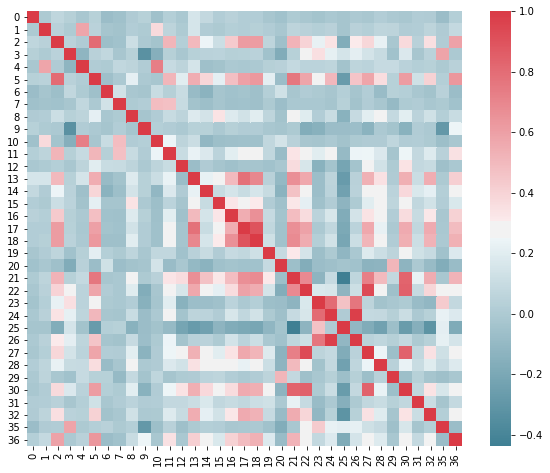

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = dataframe.corr()
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [41]:
def get_correlation(data, threshold):
    corr_col = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j])> threshold:
                colnam = corr_mat.columns[i]
                corr_col.add(colnam)
    return corr_col

In [42]:
corr_features =get_correlation(X_train_unique, 0.8)
corr_features

{5, 18, 24, 26, 27, 30}

In [43]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = x_test_unique.drop(labels= corr_features, axis = 1)

In [44]:
%%time
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
gbc.fit(X_train_uncorr,y_train)
predictions = gbc.predict(X_test_uncorr)
data = get_metrics(y_test,predictions)
df_result = df_result.append(data, ignore_index=True)

Wall time: 1min 17s


In [45]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.961261,0.951566,0.962076,0.972820,0.961142,Gardient boost classifier
1,0.961397,0.950630,0.962254,0.974166,0.961266,Gardient boost classifier
2,0.960718,0.951992,0.961503,0.971206,0.960610,Gardient boost classifier
3,0.961125,0.953224,0.961867,0.970667,0.961027,Gardient boost classifier


## ANOVA test

In [47]:
sel = f_classif(X_train_uncorr, y_train)

In [48]:
p_values = pd.Series(sel[1])
p_values.index = X_train_uncorr.columns
p_values.sort_values(ascending = True, inplace = True)

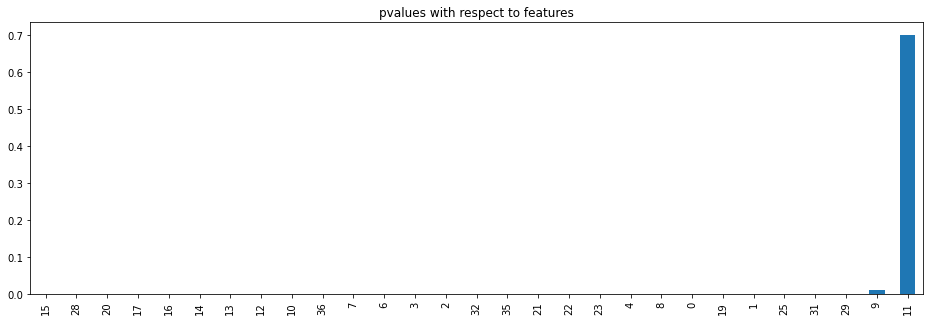

In [49]:
p_values.plot.bar(figsize = (16, 5))
plt.title('pvalues with respect to features')
plt.show()

In [50]:
p_values = p_values[p_values<0.05]

In [51]:
p_values.index

Int64Index([15, 28, 20, 17, 16, 14, 13, 12, 10, 36,  7,  6,  3,  2, 32, 35, 21,
            22, 23,  4,  8,  0, 19,  1, 25, 31, 29,  9],
           dtype='int64')

In [53]:
X_train_p = X_train_uncorr[p_values.index]
X_test_p = X_test_uncorr[p_values.index]

In [54]:
%%time
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
gbc.fit(X_train_p,y_train)
predictions = gbc.predict(X_test_p)
data = get_metrics(y_test,predictions)
df_result = df_result.append(data, ignore_index=True)

Wall time: 1min 10s


In [55]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.961261,0.951566,0.962076,0.972820,0.961142,Gardient boost classifier
1,0.961397,0.950630,0.962254,0.974166,0.961266,Gardient boost classifier
2,0.960718,0.951992,0.961503,0.971206,0.960610,Gardient boost classifier
3,0.961125,0.953224,0.961867,0.970667,0.961027,Gardient boost classifier
4,0.959766,0.948348,0.960691,0.973358,0.959626,Gardient boost classifier


## CHI2-squre test

In [57]:
f_score = chi2(X_train_p, y_train)

In [58]:
df_result.drop(df_result.index, inplace=True)

In [59]:
p_values = pd.Series(f_score[1], index = X_train_p.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values

15     0.000000e+00
1      0.000000e+00
19     0.000000e+00
0      0.000000e+00
4      0.000000e+00
22     0.000000e+00
21     0.000000e+00
35     0.000000e+00
32     0.000000e+00
3      0.000000e+00
6      0.000000e+00
2      0.000000e+00
36     0.000000e+00
10     0.000000e+00
12     0.000000e+00
13     0.000000e+00
14     0.000000e+00
16     0.000000e+00
17     0.000000e+00
20     0.000000e+00
28     0.000000e+00
7      0.000000e+00
23    1.556944e-233
8     4.988353e-131
25     9.676228e-66
31     3.481669e-43
29     1.915687e-11
9      1.790120e-02
dtype: float64

Text(0.5, 1.0, 'pvalues with respect to features')

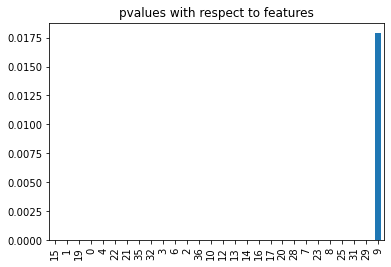

In [60]:
p_values.plot.bar()
plt.title('pvalues with respect to features')

In [61]:
X_train_2 = X_train_p.drop([9] , axis=1)
X_test_2 = X_test_p.drop([9] , axis=1)

In [62]:
%%time
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth =9, learning_rate =0.1)
gbc.fit(X_train_2,y_train)
predictions = gbc.predict(X_test_2)
data = get_metrics(y_test,predictions)
df_result = df_result.append(data, ignore_index=True)

Wall time: 1min 7s


In [63]:
df_result

,accuracy,precision,f1,recall,roc,model_name
0,0.959358,0.950673,0.960171,0.96986,0.95925,Gardient boost classifier
